## Pesquisas eleitorais no primeiro turno e o resultado das eleições no período de 2002-2014


Apesar da grande polarização e aparente efeito manada ([bandwagon](https://en.wikipedia.org/wiki/Bandwagon_effect)) em sua reta final, a eleição presidencial de 2018 é a mais fragmentada [desde 1989](https://www.bbc.com/portuguese/brasil-45661559). Naquele ano, Collor e Lula foram para o segundo turno com apenas metade dos votos dos brasileiros. Agora, pelas pesquisas eleitorais mais recentes, Bolsonaro e Haddad também possuem aproximadamente metade dos votos dos brasileiros. Mas podemos confiar que o resultado das urnas vai refletir o descrito nas pesquisas?

Todas as pesquisas relativas às eleições devem ser registradas junto à Justiça Eleitoral, com informações sobre metodologia, plano amostral, sistema interno de controle, dados básicos como intervalos de confiança e margem de erro sempre devem ser divulgados (cf. art. 33 da [Lei nº 9.504/1997](http://www.tse.jus.br/legislacao/codigo-eleitoral/lei-das-eleicoes/lei-das-eleicoes-lei-nb0-9.504-de-30-de-setembro-de-1997#art33-35)). A divulgação de pesquisa fraudulenta é crime.

Para além dos detalhes e controles realizados, podemos fazer um exercício: comparar o resultado das últimas eleições com o cenário descrito pelas pesquisas de véspera de eleição. Para isso, utilizamos dados das pesquisas de véspera do Instituto Datafolha, um dos mais respeitados institutos de pesquisa do Brasil.

Na comparação, realizada para o período de 2002 a 2014, a maior parte dos resultados apurados ficou dentro ou próximo da margem de erro de dois pontos percentuais. O destaque negativo vai para 2014, em que os votos obtidos por Aécio ficaram muito acima do previsto pelo Datafolha. Os votos de Dilma e Marina também ficaram fora da margem de erro. Este "erro" também foi replicado pelo Ibope, numa indicação de que o cenário pode realmente ter se modificado por algum motivo, mas também que os métodos utilizados podem não ter sido adequados, ainda mais quando a pesquisa boca de urna do Ibope, que ouviu 64 mil eleitores, também diferiu significativamente do resultado final.
O ano de 2014 teve um cenário relativamente mais dinâmico no plano nacional, mas as pesquisas também apresentaram erros bastante significativos nos estados.

https://epoca.globo.com/tempo/eleicoes/noticia/2014/10/por-que-bpesquisas-eleitoraisb-se-distanciam-tanto-da-realidade.html

https://noticias.r7.com/eleicoes-2014/pesquisas-erram-na-previsao-e-resultados-nas-urnas-surpreendem-eleitores-brasileiros-06102014

Novamente, fica a pergunta: como será neste 2018 tão complicado? A conferir :)

### Procedimentos

Os dados das pesquisas eleitorais foram extraídos do [Agregador de Pesquisas do site Poder 360](https://www.poder360.com.br/pesquisas-de-opiniao/).
Os resultados das apurações eleitorais foram retirados da [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_elei%C3%A7%C3%B5es_presidenciais_no_Brasil), com checagem de parte dos dados no site do TSE.

Como o volume de dados é bastante reduzido, e a análise pretendida, bastante simples, todo o trabalho poderia ser realizado rapidamente e sem problemas em uma planilha de Excel. Entretanto, o objetivo deste estudo é também praticar procedimentos de processamento de dados na linguagem R. Por isso, uma consolidação inicial foi feita em planilha Excel e os dados exportados em formato csv.

De posse dos dados pré-organizados, vamos então fazer uma comparação entre o previsto nas pesquisas e o resultado nas urnas. Para a série histórica, vamos apresentar graficamente as maiores diferenças observadas. Para isso construiremos dois gráficos: um mostrando a diferença entre os percentuais de votos totais, e outro gráfico mostrando a diferença em termos de votos válidos. 
Utilizaremos os pacotes do [Tidyverse](www.tidyverse.org/), como readr, dplyr e ggplot2.

In [1]:
library(tidyverse)

ele_df <- read_csv2("Resultados-DF-1T.csv")

head(ele_df)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  CANDIDATO = col_character(),
  ID = col_character(),
  Partido = col_character(),
  ANO = col_integer(),
  TOTAL = col_integer(),
  `%V/VV` = col_double(),
  `%simples` = col_double(),
  `DataF%VV` = col_double(),
  `DataF%simples` = col_integer(),
  Margem = col_integer(),
  `PD ref` = col_character()
)


CANDIDATO,ID,Partido,ANO,TOTAL,%V/VV,%simples,DataF%VV,DataF%simples,Margem,PD ref
Luiz Inácio Lula da Silva,Lula-02,PT,2002,39455233,46.44386855,41.61841724,48,45,NA,4-5/out/02
José Serra,Serra-02,PSDB,2002,19705445,23.19583557,20.78582154,21,19,NA,4-5/out/02
Anthony Garotinho,Garotinho-02,PPS,2002,15180097,17.86892070,16.01236548,19,17,NA,4-5/out/02
Ciro Gomes,Ciro-02,PSB,2002,10170882,11.97243232,10.72851378,12,11,NA,4-5/out/02
José Maria de Almeida,ZéMaria-02,PSTU,2002,402236,0.47348335,0.42428911,1,1,NA,4-5/out/02
Rui Costa Pimenta,Rui-02,PCO,2002,38619,0.04545951,0.04073634,0,0,NA,4-5/out/02


In [5]:
# Tendo em vista a análise que será feita, vamos retirar linhas de branco e nulos, que podem
# atrapalhar comparações, e prosseguir com pipe selecionando apenas as variáveis (colunas)
# de interesse e criando duas novas colunas de comparação pesquisa-resultado: uma para  
# percentual de votos totais e outra em relação a votos válidos.
ele_ed <- filter(ele_df, CANDIDATO != "BRANCO", CANDIDATO != "NULOS") %>% 
         select(ID, Partido, ANO, "%V/VV", "%simples", "DataF%VV", "DataF%simples") %>% 
         mutate(Diff_simples = `%simples` - `DataF%simples`,
                Diff_validos = `%V/VV` - `DataF%VV`)


# Como vamos criar dois gráficos, um baseado em Diff_simples e outro em Diff_validos,
# vamos criar duas tbls: cada uma ordenada pelo valor absoluto da variável de interesse

bydiffsimples <- arrange(ele_ed, desc(abs(Diff_simples)))

bydiffvalidos <- arrange(ele_ed, desc(abs(Diff_validos)))

Com os dados editados e organizados, podemos construir os gráficos.

Mas antes um detalhe importante: o "ID" dos candidatos será utilizado como a variável categórica no eixo x. Deste modo, o gráfico construído terá os IDs ordenados em ordem alfabética. Entretanto, queremos que os IDs estejam ordenados pelo valor correspondente de Diff_simples ou Diff_validos. Para isto, vamos criar uma nova variável ID2 explicitando sua ordenação pelo valor correspondente da diferença entre pesquisa e resultado da urna. 

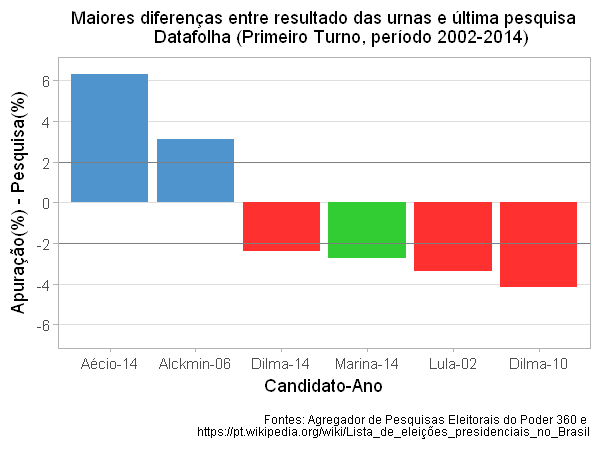

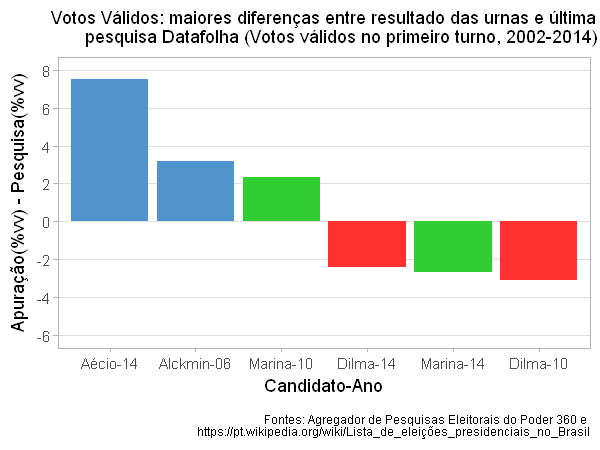

In [6]:
bydiffsimples$ID2 <- reorder(bydiffsimples$ID, -bydiffsimples$Diff_simples)
bydiffvalidos$ID2 <- reorder(bydiffvalidos$ID, -bydiffvalidos$Diff_validos)


# Definindo parâmetros gerais de tamanho e tema dos gráficos
options(repr.plot.width=5, repr.plot.height=3.75)
tema <- theme_light() +
        theme(panel.grid.minor = element_blank(), panel.grid.major.x = element_blank(),
        plot.caption = element_text(size = 7, margin = margin(t = 13, unit = "pt")),
        legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11),
        axis.text.y = element_text(size = 9))


ggplot(bydiffsimples[1:6,], aes(x = ID2, y = Diff_simples)) +
  geom_col(aes(fill = Partido)) +
  geom_hline(mapping, yintercept =  2, color = "gray50") +
  geom_hline(mapping, yintercept =  -2, color = "gray50") +
  scale_x_discrete(name = "Candidato-Ano") +
  scale_y_continuous(name = "Apuração(%) - Pesquisa(%)", limits = c(-6.5,6.5),
                     breaks = seq(-6,6,2)) +
  scale_fill_manual(values = c("steelblue3","firebrick1","limegreen")) +
  labs(title = "Maiores diferenças entre resultado das urnas e última pesquisa
       Datafolha (Primeiro Turno, período 2002-2014)",
       caption = "Fontes: Agregador de Pesquisas Eleitorais do Poder 360 e 
       https://pt.wikipedia.org/wiki/Lista_de_eleições_presidenciais_no_Brasil") +
  tema

ggplot(bydiffvalidos[1:6,], aes(x = ID2, y = Diff_validos)) +
  geom_col(aes(fill = Partido)) +
  scale_x_discrete(name = "Candidato-Ano") +
  scale_y_continuous(name = "Apuração(%vv) - Pesquisa(%vv)", limits = c(-6,8),
                     breaks = seq(-6,8,2)) +
  scale_fill_manual(values = c("steelblue3","firebrick1","limegreen", "limegreen")) +
  labs(title = "Votos Válidos: maiores diferenças entre resultado das urnas e última
       pesquisa Datafolha (Votos válidos no primeiro turno, 2002-2014)",
       caption = "Fontes: Agregador de Pesquisas Eleitorais do Poder 360 e 
       https://pt.wikipedia.org/wiki/Lista_de_eleições_presidenciais_no_Brasil") +
  tema
